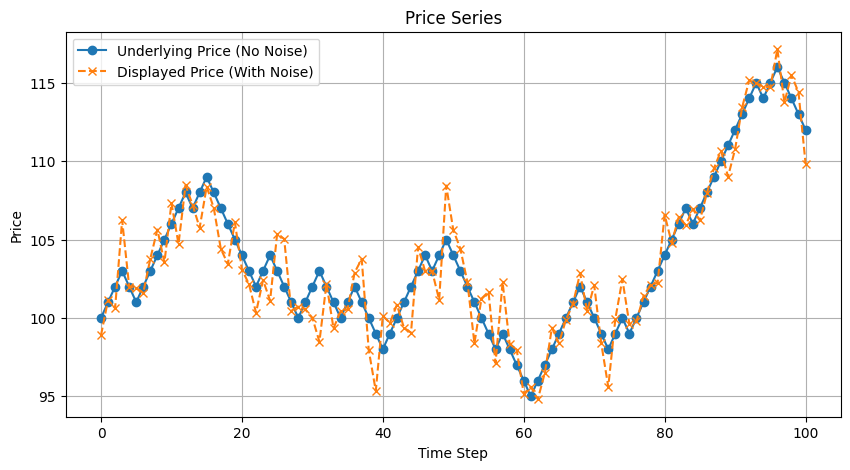

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_price_series(num_steps, init_price=100, p_up=0.7, p_down=0.7, step=1):
    """
    To simulate the price series, Markov chain based rules:
    -If the current period price >= the last period price, it is considered to be in the rising state, then the next period will rise with probability p_up, otherwise it will fall.
    -If the current period price < the previous period price, it is considered to be in a declining state, in which case the next period will fall with probability p_down, otherwise it will rise.
    Note: The price series generated by this function are "base" series and do not contain noise, subsequent noise is added for presentation only.
    """
    prices = [init_price]
    
    if np.random.rand() < 0.5:
        prices.append(init_price + step)
    else:
        prices.append(init_price - step)
    
    for t in range(1, num_steps):
        if prices[t] >= prices[t-1]:
            if np.random.rand() < p_up:
                prices.append(prices[t] + step)
            else:
                prices.append(prices[t] - step)
        else:
            if np.random.rand() < p_down:
                prices.append(prices[t] - step)
            else:
                prices.append(prices[t] + step)
    return prices

num_steps = 100
init_price = 100
p_up = 0.7
p_down = 0.7
step = 1

underlying_prices = simulate_price_series(num_steps, init_price, p_up, p_down, step)

noise_std = 1.5

display_prices = np.array(underlying_prices) + np.random.normal(0, noise_std, len(underlying_prices))

plt.figure(figsize=(10,5))
plt.plot(underlying_prices, label='Underlying Price (No Noise)', marker='o')
plt.plot(display_prices, label='Displayed Price (With Noise)', marker='x', linestyle='--')
plt.title("Price Series")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
